In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
fb = pd.read_csv("ticker-fb.csv", index_col=0, parse_dates=True)

In [3]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,181.580002,177.550003,177.679993,181.419998,18151900,181.419998
2018-01-03,184.779999,181.330002,181.880005,184.669998,16886600,184.669998
2018-01-04,186.210007,184.100006,184.899994,184.330002,13880900,184.330002
2018-01-05,186.899994,184.929993,185.589996,186.850006,13574500,186.850006
2018-01-08,188.899994,186.330002,187.199997,188.279999,17994700,188.279999


### Create an Exponential Moving Average (EMA) indicator function

In [8]:
def EMA(data, period = 20, column = 'Adj Close'):
    return data[column].ewm(span = period, adjust = False).mean()

### Create a function to calculate the Stochastic Relative Strength index

In [9]:
def StochRSI(data, period = 14, column = 'Adj Close'):
    delta = data[column].diff(1) # The function will find the discrete difference over the column axis with the period value 1
    delta = delta.dropna() # Drop/remove the na's
    up = delta.copy()
    down = delta.copy()
    up[up<0] = 0
    down[down>0] = 0
    data['up'] = up # We are creating new columns to store the up and down values into
    data['down'] = down
    AVG_Gain = EMA(data, period, column = 'up')
    AVG_Loss = abs(EMA(data, period, column = 'down'))
    RS = AVG_Gain/AVG_Loss # We can now calculate the relative strength from two above averages
    RSI = 100.0 - (100.0/(1.0 + RS))
    
    stock_rsi = (RSI - RSI.rolling(period).min()) / (RSI.rolling(period).max() - RSI.rolling(period).min())
    
    return stock_rsi

### Store the StochRSI in a new column

In [10]:
fb['StochRSI'] = StochRSI(fb)

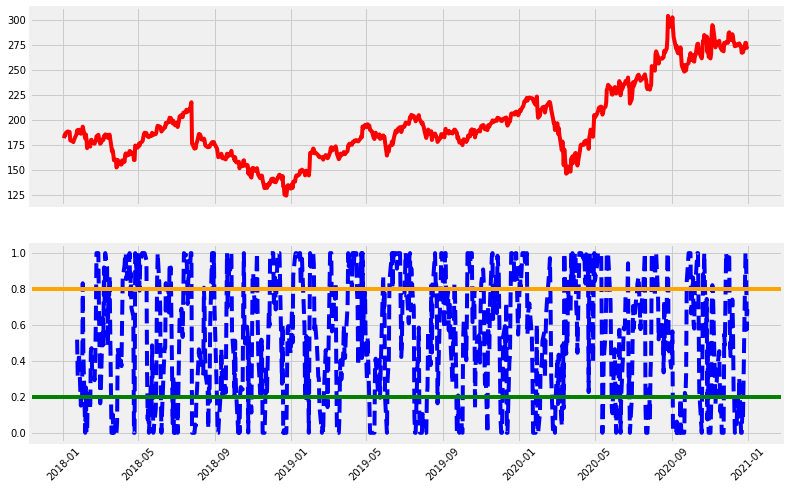

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True, figsize = (12, 8))

ax1.plot(fb.index, fb['Adj Close'], color = 'r')

ax2.plot(fb.index, fb['StochRSI'], color = 'b', linestyle = '--')

plt.xticks(rotation = 45)
# Plot oversold (0.2; indicator to buy) and overbought (0.8; indicator to sell) lines
ax2.axhline(0.2, color = 'green')
ax2.axhline(0.8, color = 'orange')